In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data 
data = pd.read_csv('Data_inc.csv')
data.head()

Age   Profession Class  Final_census   Education   Education-num  \
0   39          State-gov         77516   Bachelors              13   
1   50   Self-emp-not-inc         83311   Bachelors              13   
2   38            Private        215646     HS-grad               9   
3   53            Private        234721        11th               7   
4   28            Private        338409   Bachelors              13   

        marital-status          occupation    relationship    race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week         country  income  \
0           2174              0               40   United-States   <=50K   
1              0              0               13   United-States   <=50K   
2              0              0               40   United-States   <=50K   
3              0              0               40   United-States   <=50K   
4              0              0               40            Cuba   <=50K   

   Unnamed: 15  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [3]:
# Checking columns
data.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income', 'Unnamed: 15'],
      dtype='object')

In [4]:
data.describe().T

count           mean            std      min       25%  \
Age              32561.0      38.581647      13.640433     17.0      28.0   
Final_census     32561.0  189778.366512  105549.977697  12285.0  117827.0   
 Education-num   32561.0      10.080679       2.572720      1.0       9.0   
 capital-gain    32561.0    1077.648844    7385.292085      0.0       0.0   
 capital-loss    32561.0      87.303830     402.960219      0.0       0.0   
 hours-per-week  32561.0      40.437456      12.347429      1.0      40.0   
Unnamed: 15          2.0   55000.000000       0.000000  55000.0   55000.0   

                      50%       75%        max  
Age                  37.0      48.0       90.0  
Final_census     178356.0  237051.0  1484705.0  
 Education-num       10.0      12.0       16.0  
 capital-gain         0.0       0.0    99999.0  
 capital-loss         0.0       0.0     4356.0  
 hours-per-week      40.0      45.0       99.0  
Unnamed: 15       55000.0   55000.0    55000.0

In [5]:
# Removing the spaces in the column names
data = data.rename(columns= lambda col: col.strip())

In [6]:
data.columns

Index(['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income',
       'Unnamed: 15'],
      dtype='object')

In [7]:
# Drop Unnamed: 15
data.drop(columns='Unnamed: 15', axis=1, inplace=True)

In [8]:
# Checking unique values of each column
for i in data.columns:
    ud = data[i].unique()
    print(f'{i} : {ud}\n')

Age : [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Profession Class : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Final_census : [ 77516  83311 215646 ...  34066  84661 257302]

Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital-status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving

In [9]:
# Removing before and after spaces in the value
for i in data.columns:
   if data[i].dtypes == 'object':
    data[i] = data[i].str.strip()

In [10]:
# Checking missing values
data.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
Education           0
Education-num       0
marital-status      0
occupation          0
relationship        0
race                0
Gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
country             0
income              0
dtype: int64

- Here the dataset is not using the default nan string for missing values, instead "?" is used
- Hence we check occurrences of "?" in each column

In Profession Class number of '?' is 1836, which is 5.64% of the total data
In occupation number of '?' is 1843, which is 5.66% of the total data
In country number of '?' is 583, which is 1.79% of the total data


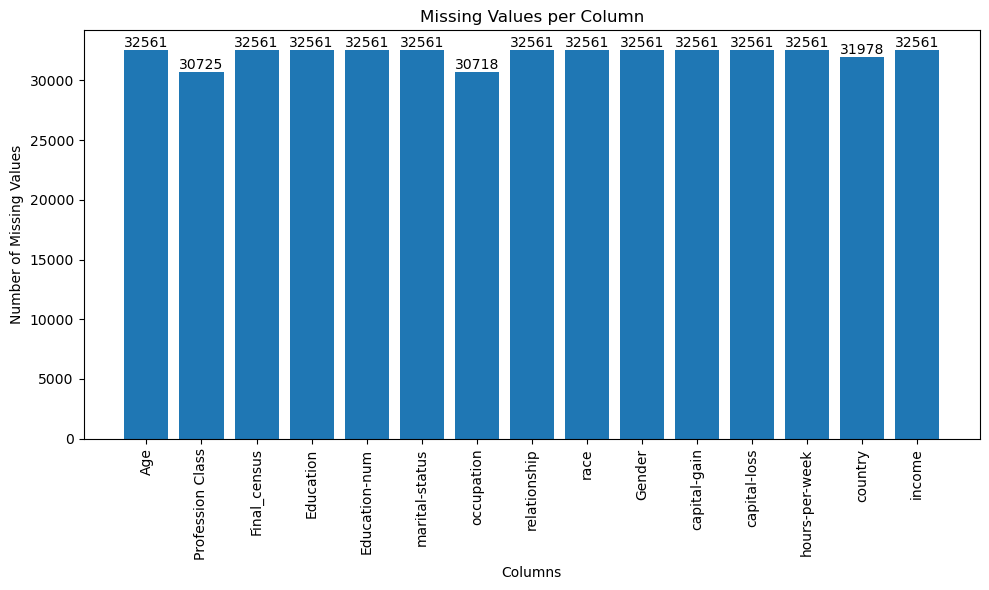

In [11]:
num_data = data.shape[0]

for i in data.columns:
    num_non = data[i].isin(['?']).sum()
    if num_non > 0:
        print(f"In {i} number of '?' is {num_non}, which is {num_non/data[i].shape[0]*100 :.2f}% of the total data")

# Creating a Function to annotate the count values on top of each bar
def annotate_bar_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

missing_values = data.isin(['?']).sum()  # Count '?'' values in each column
total_values = [data[i].shape[0] for i in data.columns]
bar_value = total_values - missing_values

plt.figure(figsize=(10, 6))  
plt.bar(bar_value.index, bar_value.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.xticks(rotation=90)  
plt.tight_layout()
annotate_bar_counts(plt.gca())
plt.show()

- There are very little values missing in the data. Since the three columns where there are missing values are categorical, looking at their distribution plots we can go for Mode value imputation.

In [12]:
# Converting "?" values into NaN values
data.replace('?', np.nan, inplace=True)
data.isnull().sum()

Age                    0
Profession Class    1836
Final_census           0
Education              0
Education-num          0
marital-status         0
occupation          1843
relationship           0
race                   0
Gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
country              583
income                 0
dtype: int64

In [13]:
# Fill missing values with mode
for i in data.columns:
    if data[i].isnull().sum() > 0:
        data[i].fillna(data[i].mode()[0], inplace=True)

In [14]:
#Verifying
data.isnull().sum()

Age                 0
Profession Class    0
Final_census        0
Education           0
Education-num       0
marital-status      0
occupation          0
relationship        0
race                0
Gender              0
capital-gain        0
capital-loss        0
hours-per-week      0
country             0
income              0
dtype: int64

# Visualization

In [15]:
# Set the style and context for seaborn plots
sns.set_style("whitegrid")
sns.set_context("talk")

# Define a custom color palette (feel free to adjust!)
sns.set_palette('Paired')

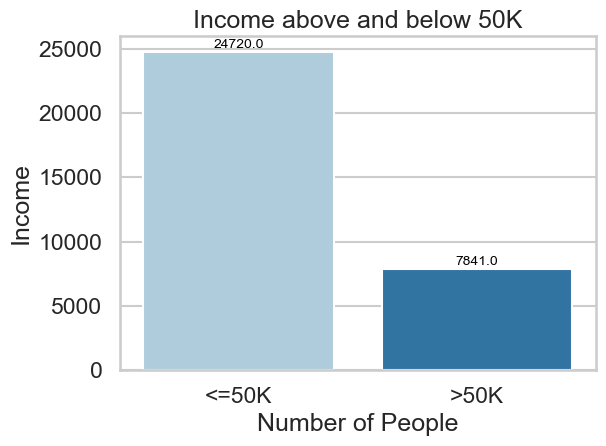

In [16]:
# Checking for the class imbalance of the income
sns.countplot(data=data, x='income')
plt.title("Income above and below 50K")
plt.xlabel('Number of People')
plt.ylabel('Income')
plt.tight_layout()
annotate_bar_counts(plt.gca())
plt.show()

In [17]:
below_50K = (data['income'] == '<=50K').sum()
above_50K = (data['income'] == '>50K').sum()
print(f"Number of people earning below 50K: {below_50K}\nNumber of people earning above 50K: {above_50K}")
print(f'People who are earning below 50K are {(below_50K/above_50K):.2f}% time who are earning above 50K')

Number of people earning below 50K: 24720
Number of people earning above 50K: 7841
People who are earning below 50K are 3.15% time who are earning above 50K


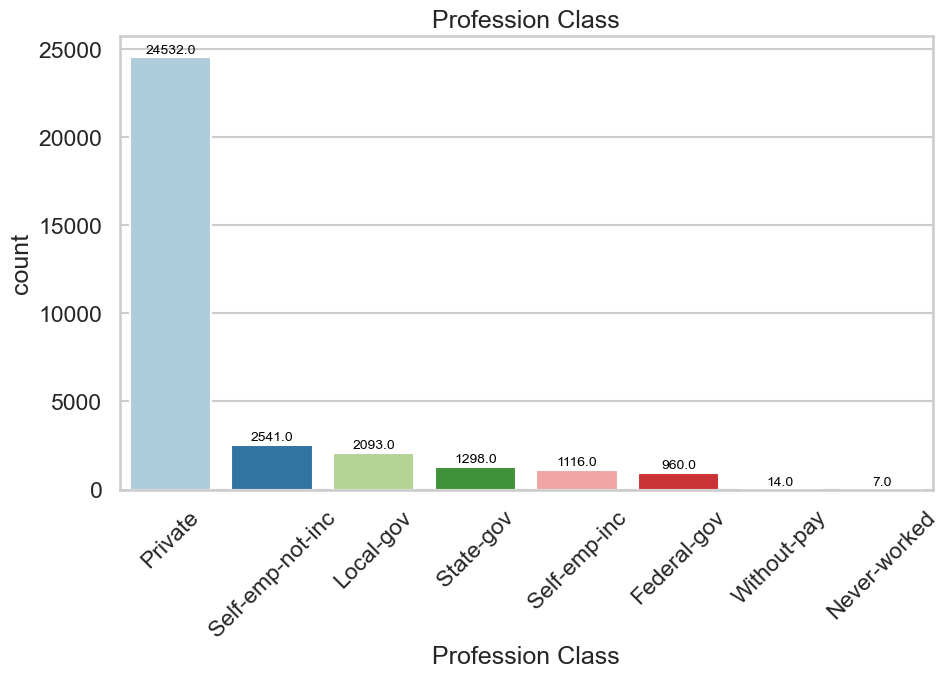

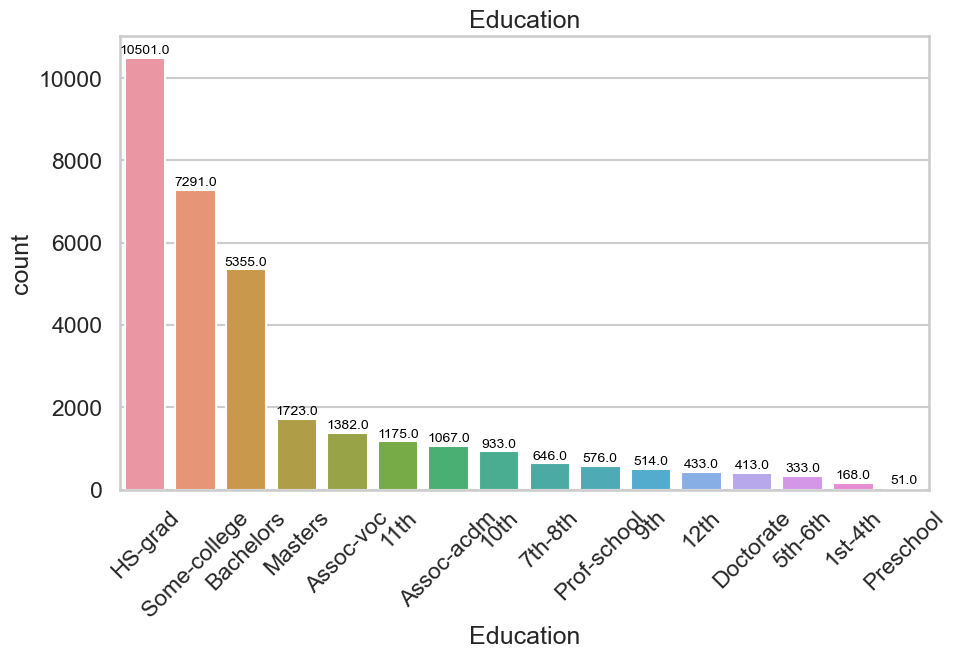

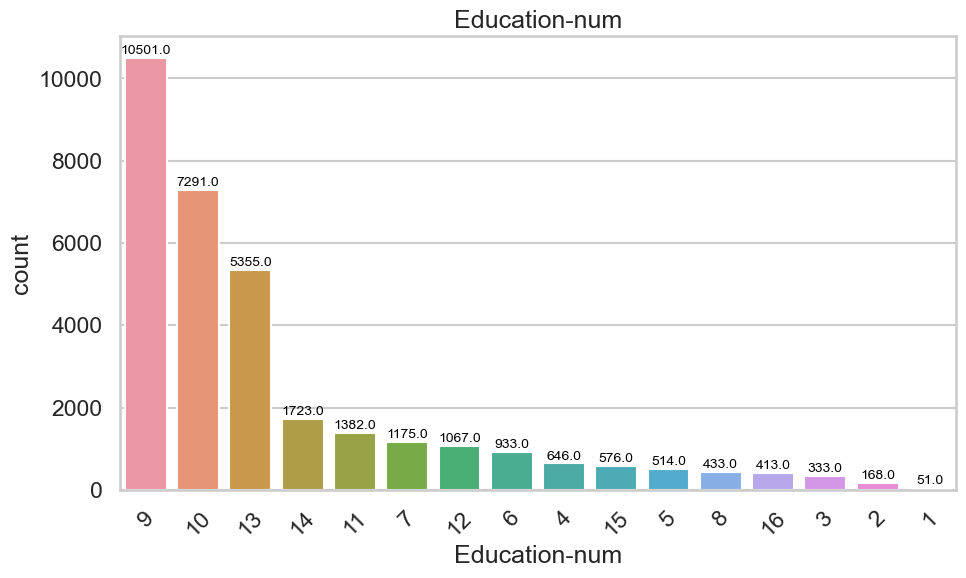

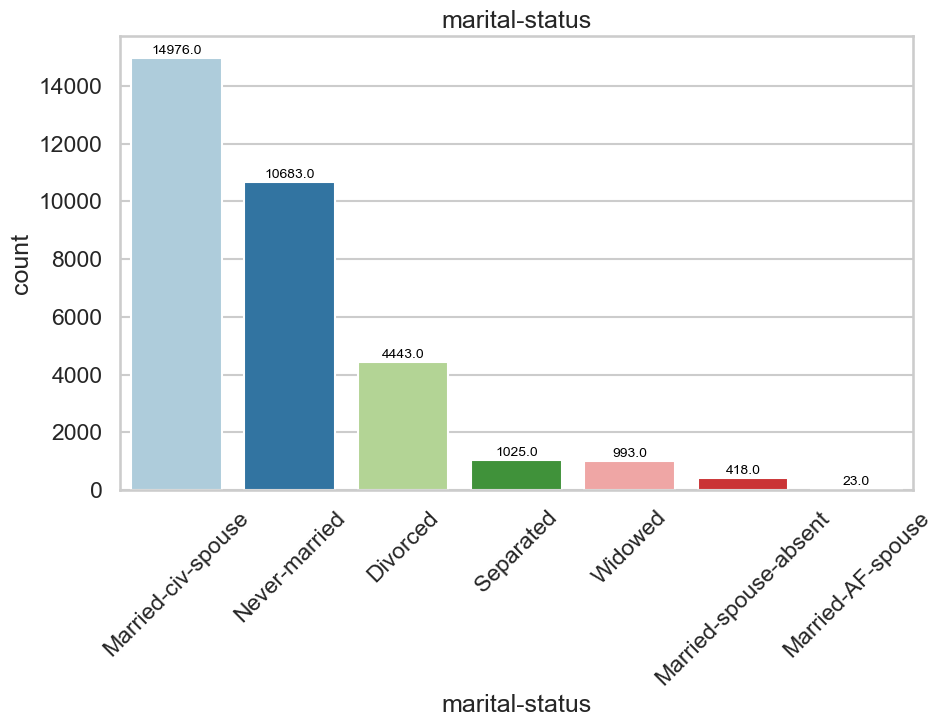

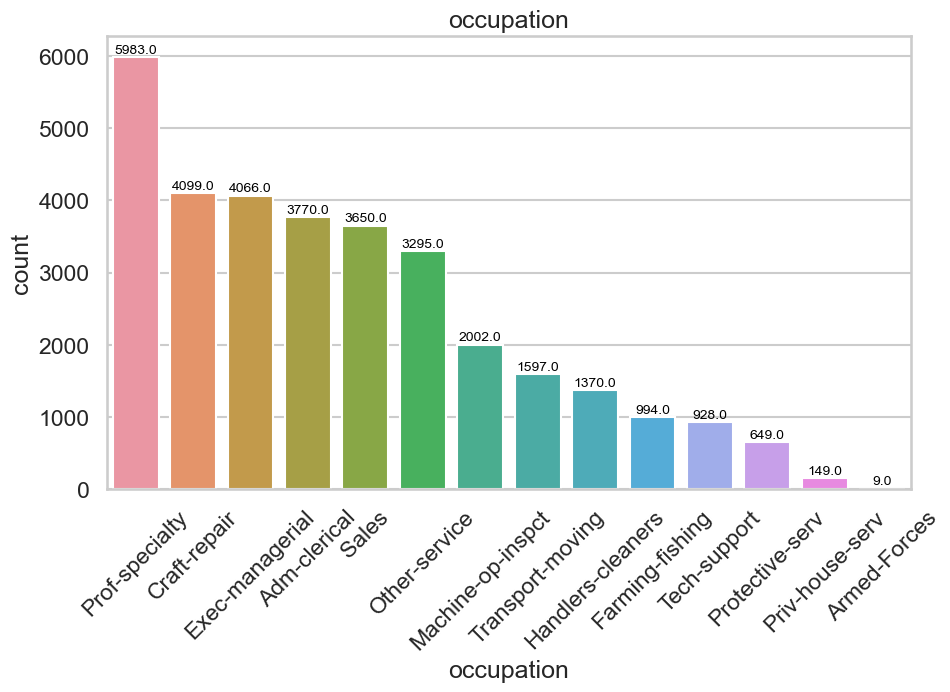

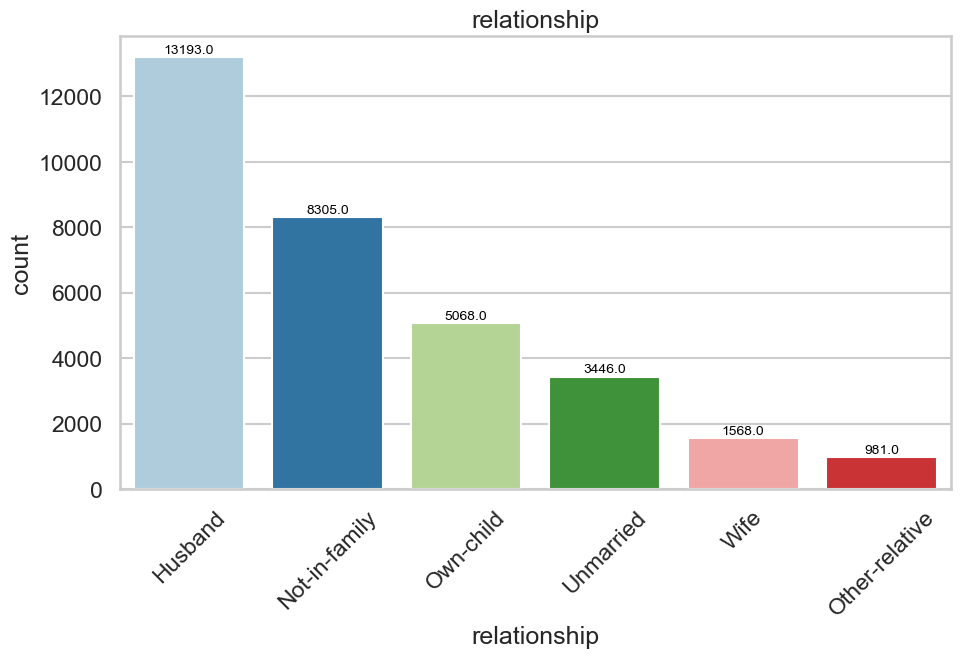

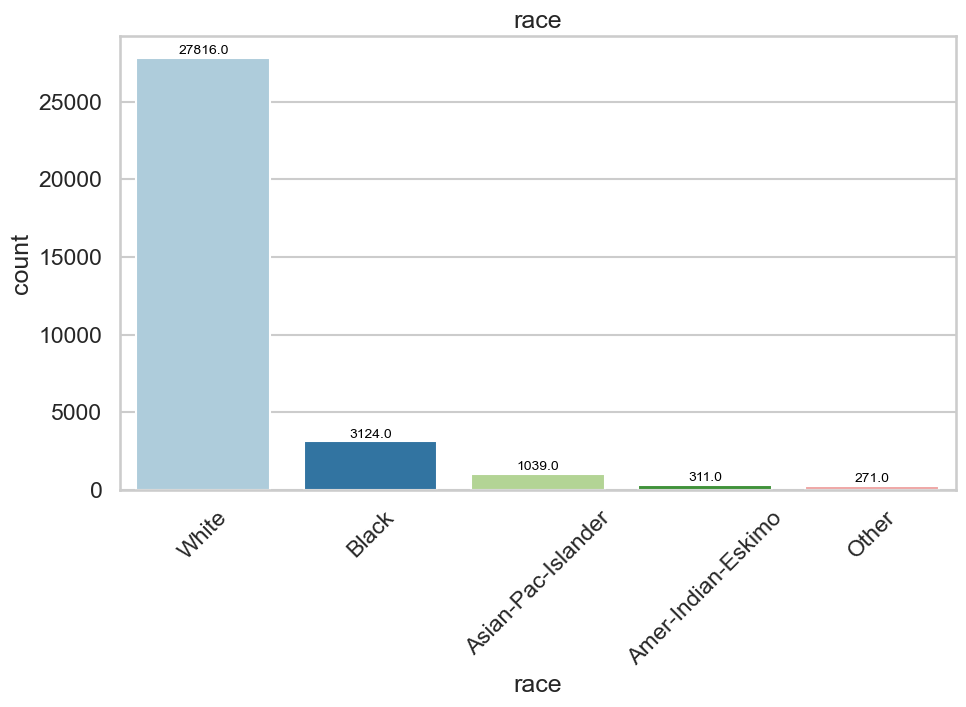

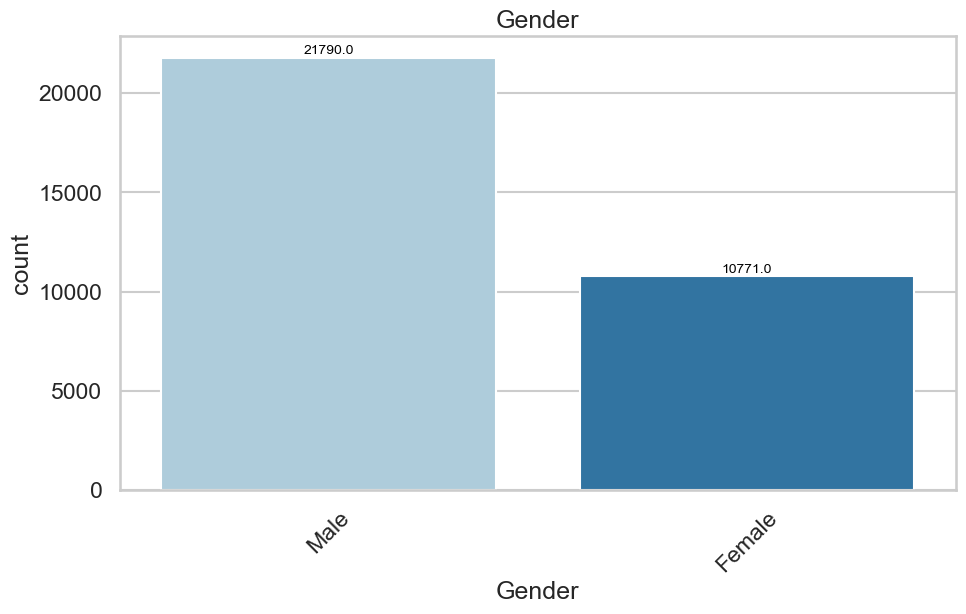

In [18]:
# Checking Individual Columns
col = ['Profession Class', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender']
for i in col:
    order= list(data[i].value_counts().index)
    values = list(data[i].value_counts().values)

    plt.figure(figsize=(10,6))
    sns.countplot(data=data, x=i, order=order)
    plt.title(i)
    annotate_bar_counts(plt.gca())
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

- This dataset consists nearly 70 percent of men.
- This dataset consists of white race people mostly.
- The majority of people in the dataset have jobs in the private sector. This suggests that the private sector is the largest employer in the economy. Government jobs are less common, but still represent a significant portion of the workforce.
- The majority of people are married or in a relationship.
- There is a significant number of unmarried people and not-in-family.
- There is a small number of people who are other relatives.

I notice that the Education column related with EducationNum column Where:

- HS-grad = 9 years of education completed.
- Some-college = 10
- Bachelors = 13
- Masters = 14
- Assoc-voc = 11 And So On..

We will drop Education column.

In [19]:
data.drop(columns='Education', inplace=True, axis=1)

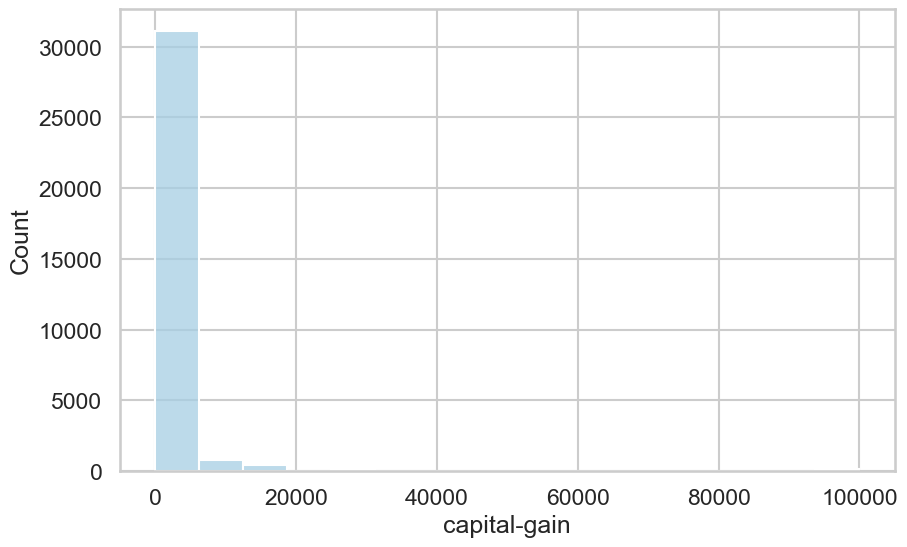

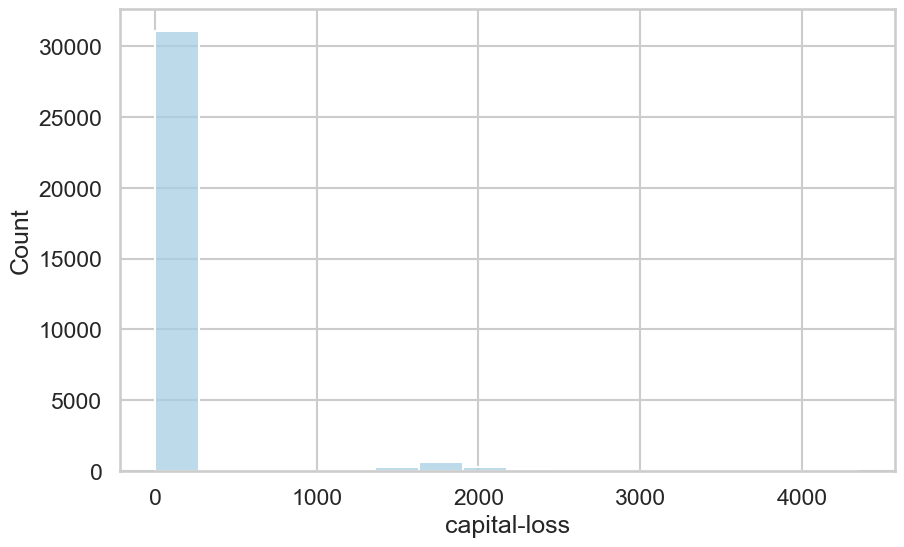

In [20]:
# Checking capital gain and capital loss 
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='capital-gain')
plt.xlabel('capital-gain')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=data,x='capital-loss')
plt.xlabel('capital-loss')
plt.ylabel('Count')
plt.show()

- From above histograms, we came to understand that mode of capital-gain and capital loss is 0.

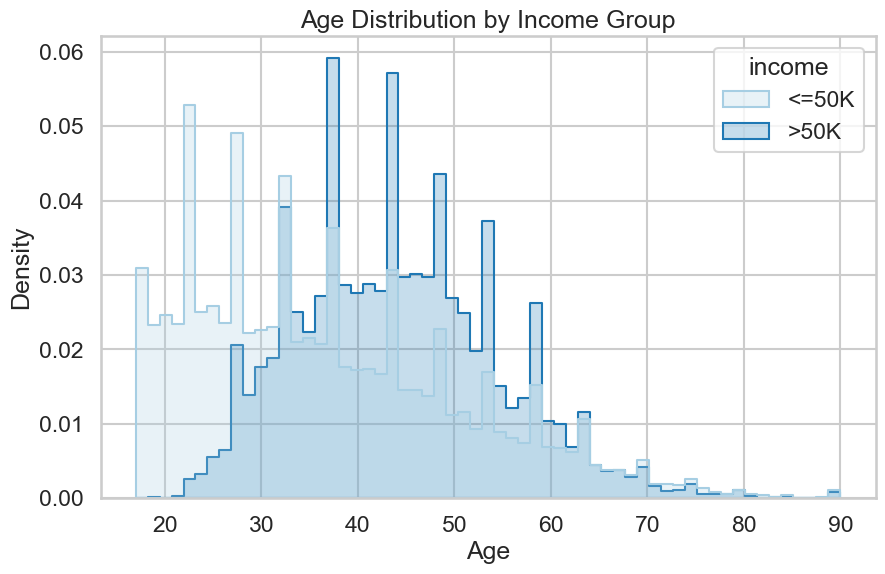

In [21]:
# Age Distribution by Income Group 
plt.figure(figsize=(10, 6))
sns.histplot(data, x="Age", hue="income", element="step", stat="density", common_norm=False)
plt.title('Age Distribution by Income Group')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

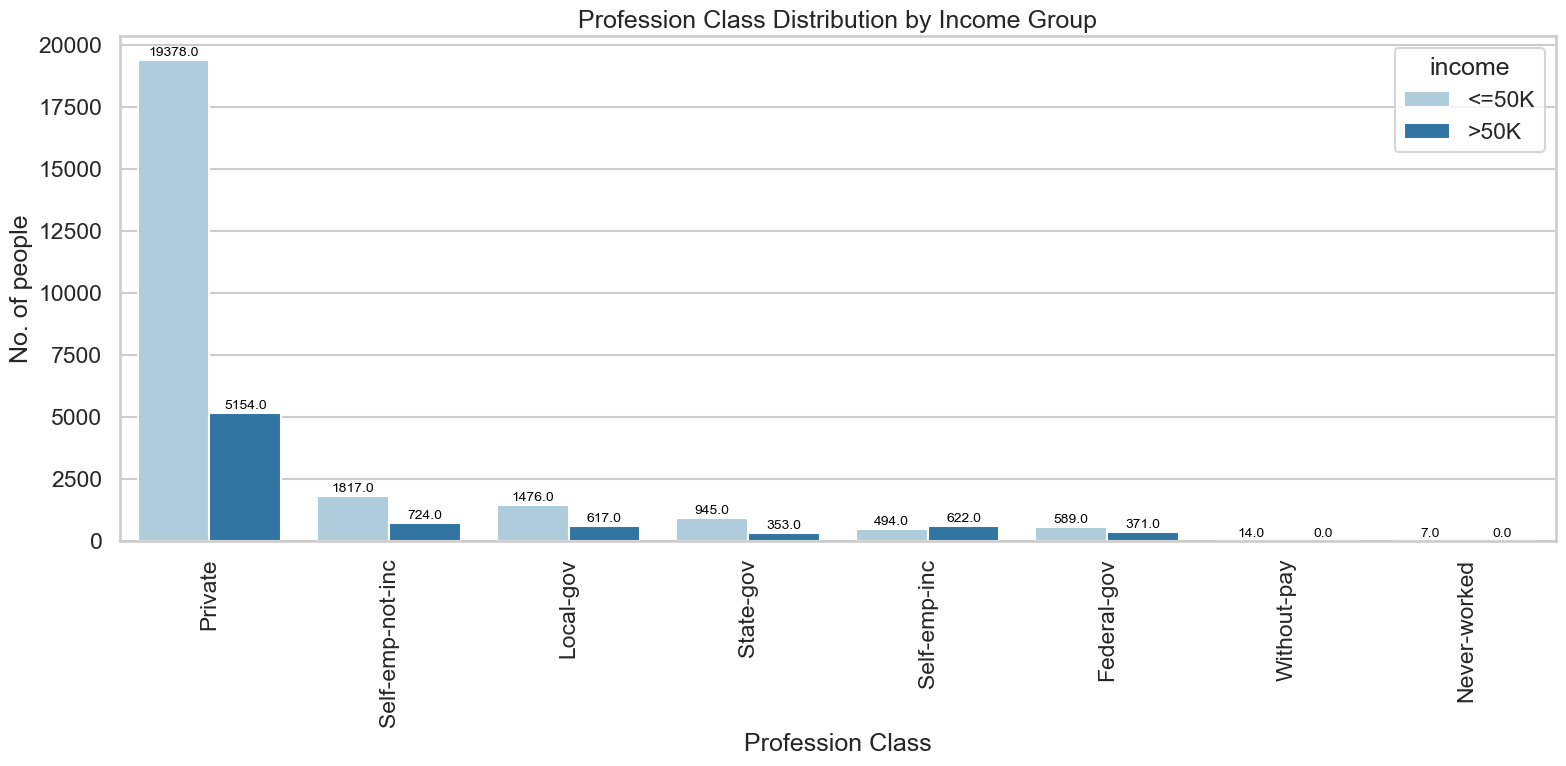

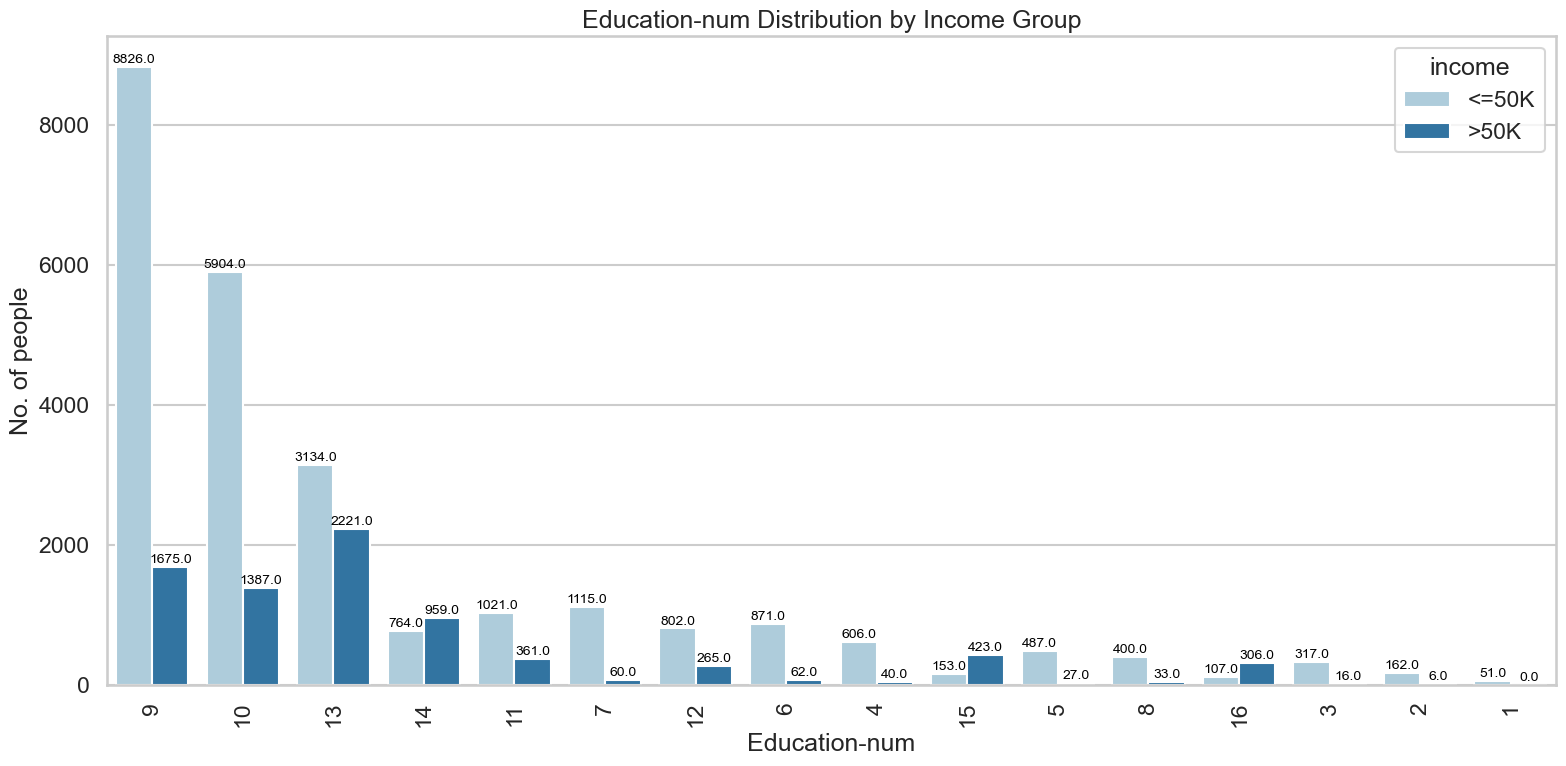

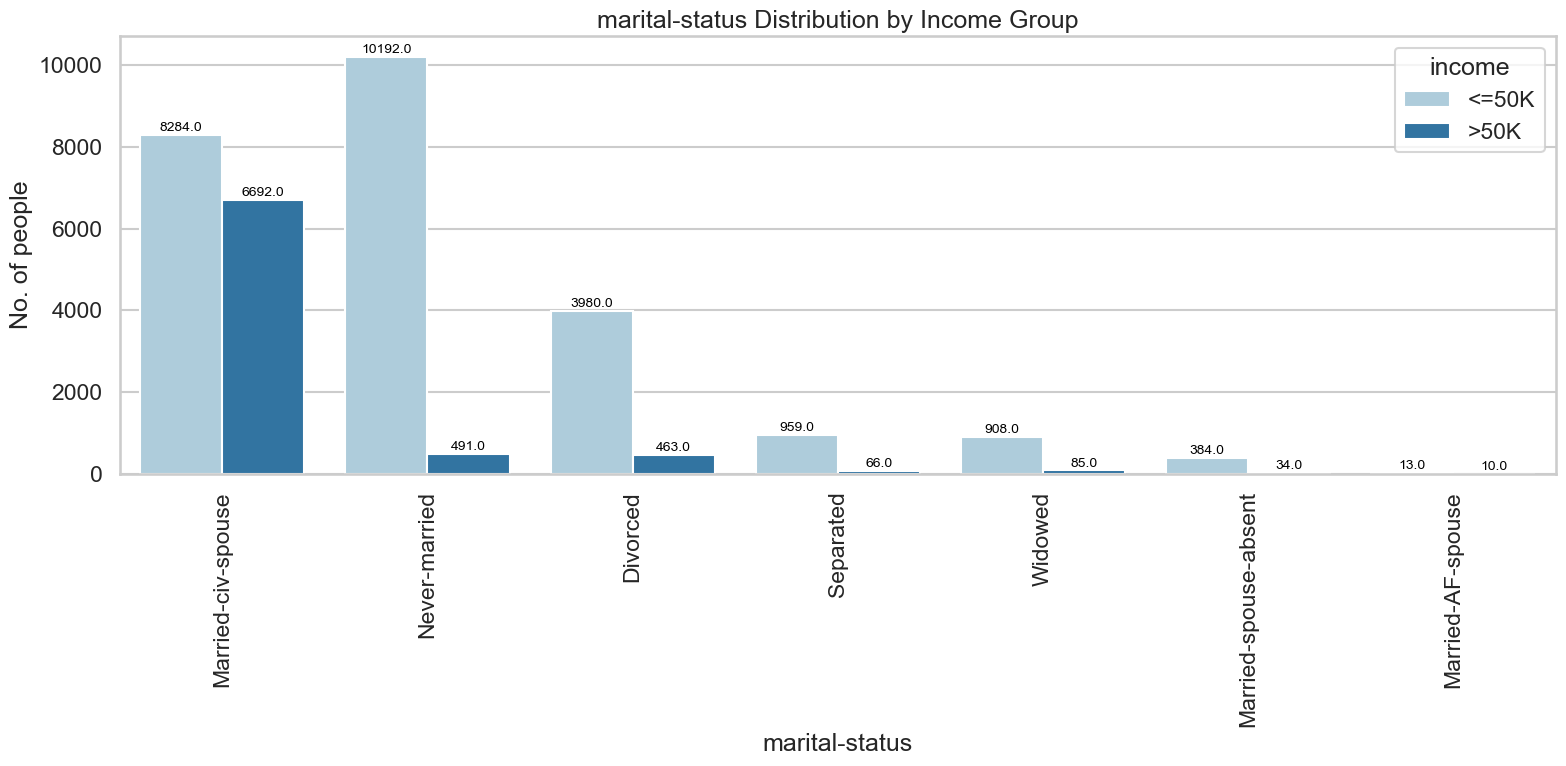

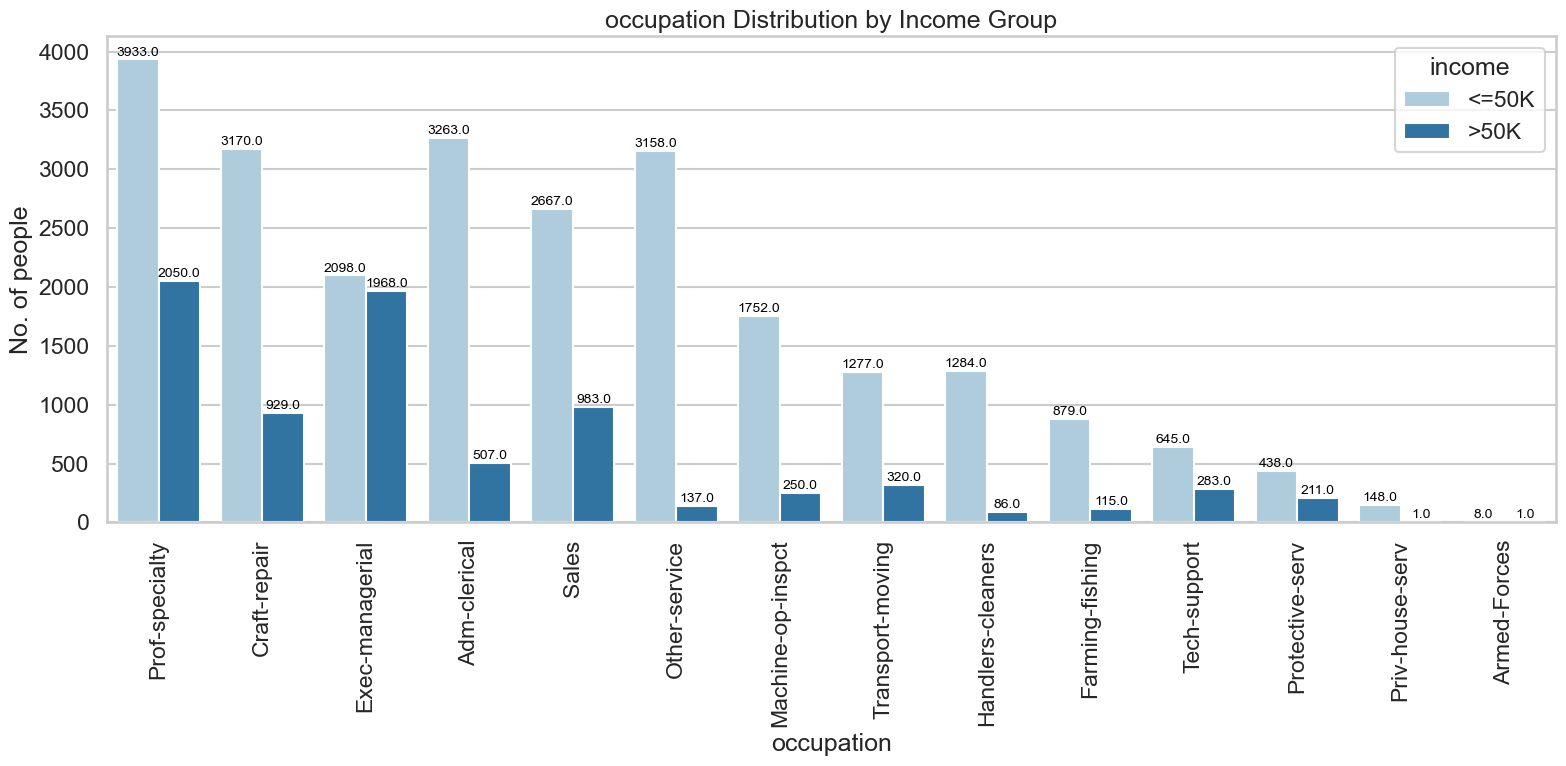

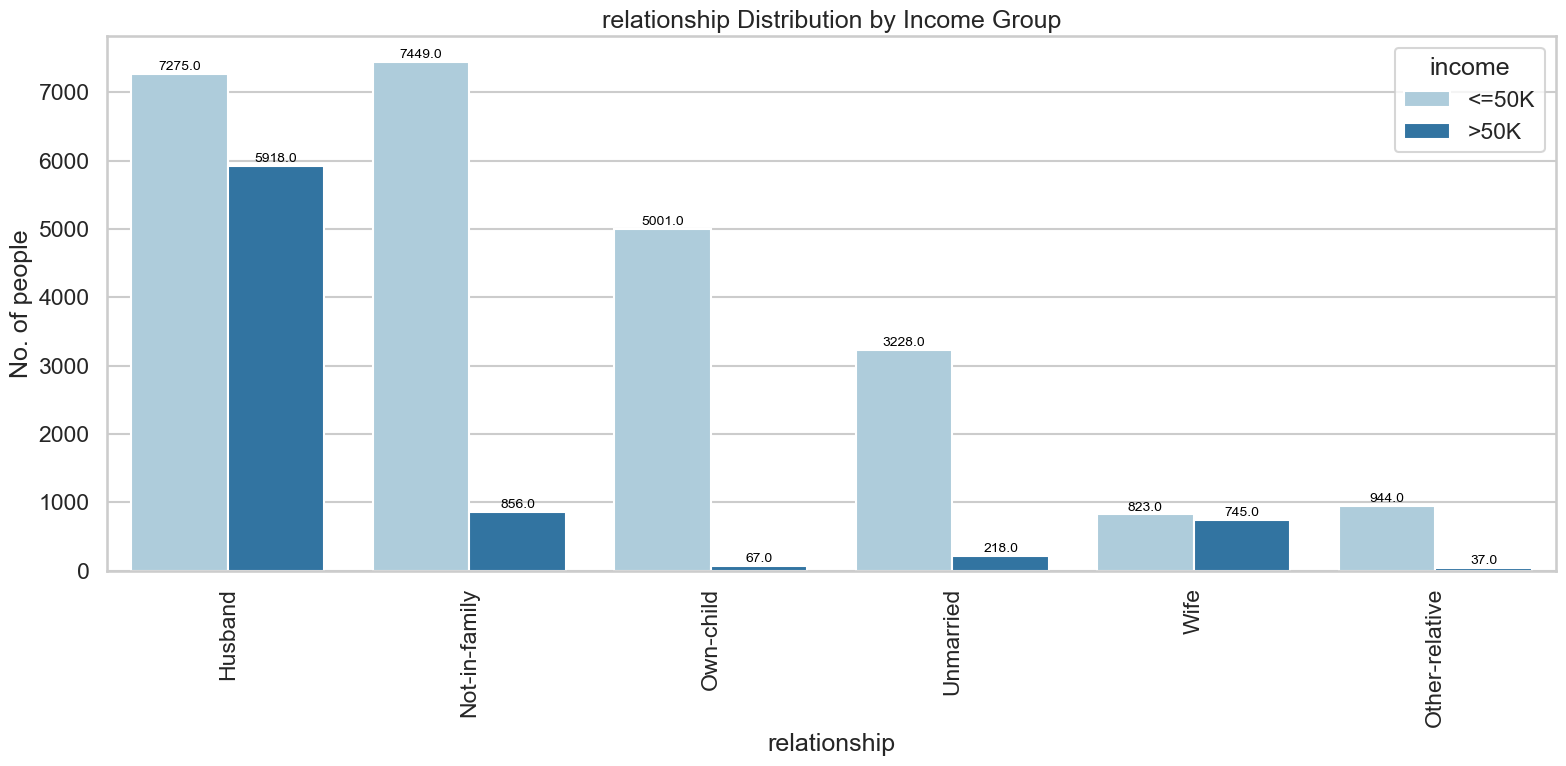

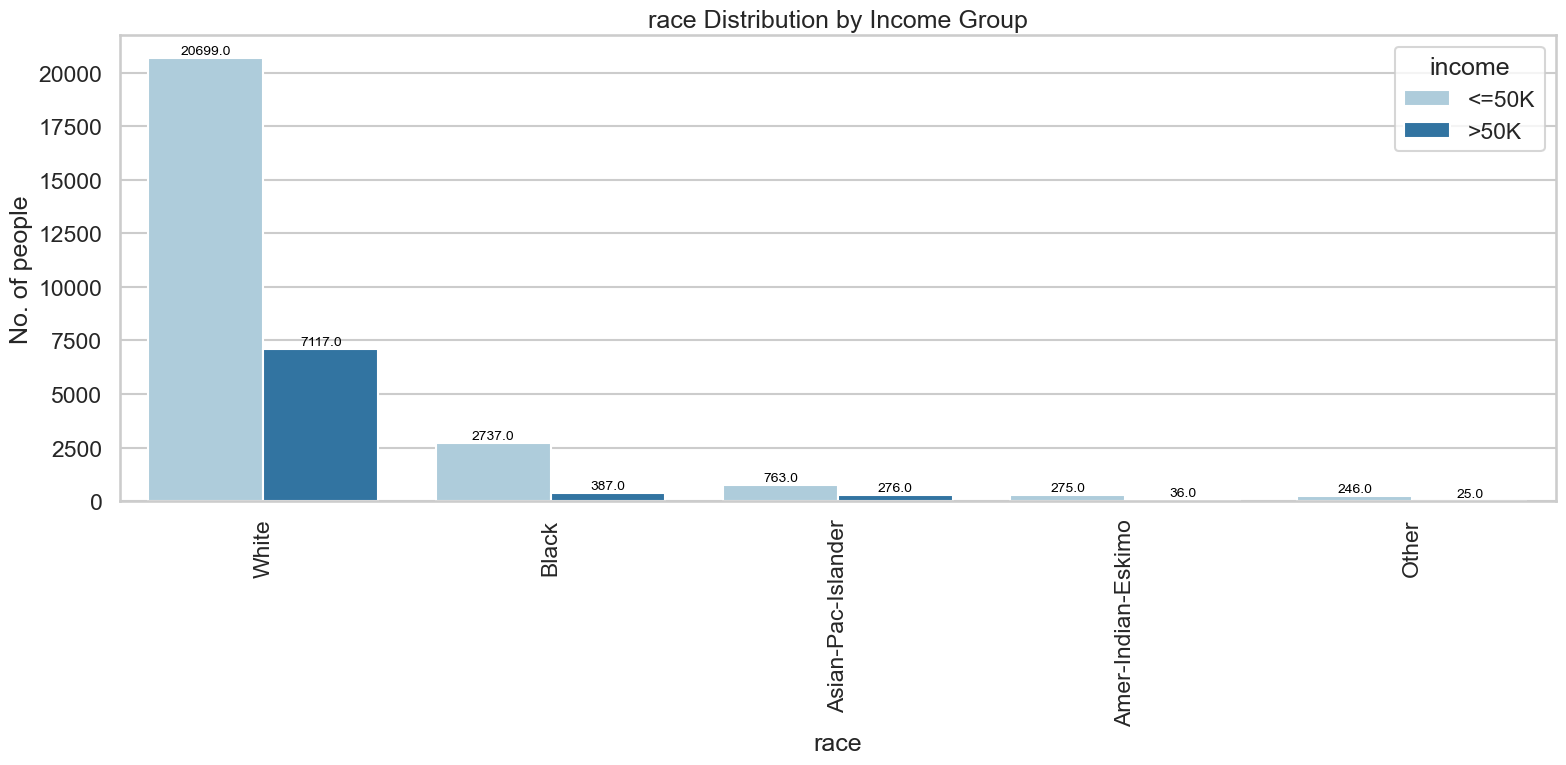

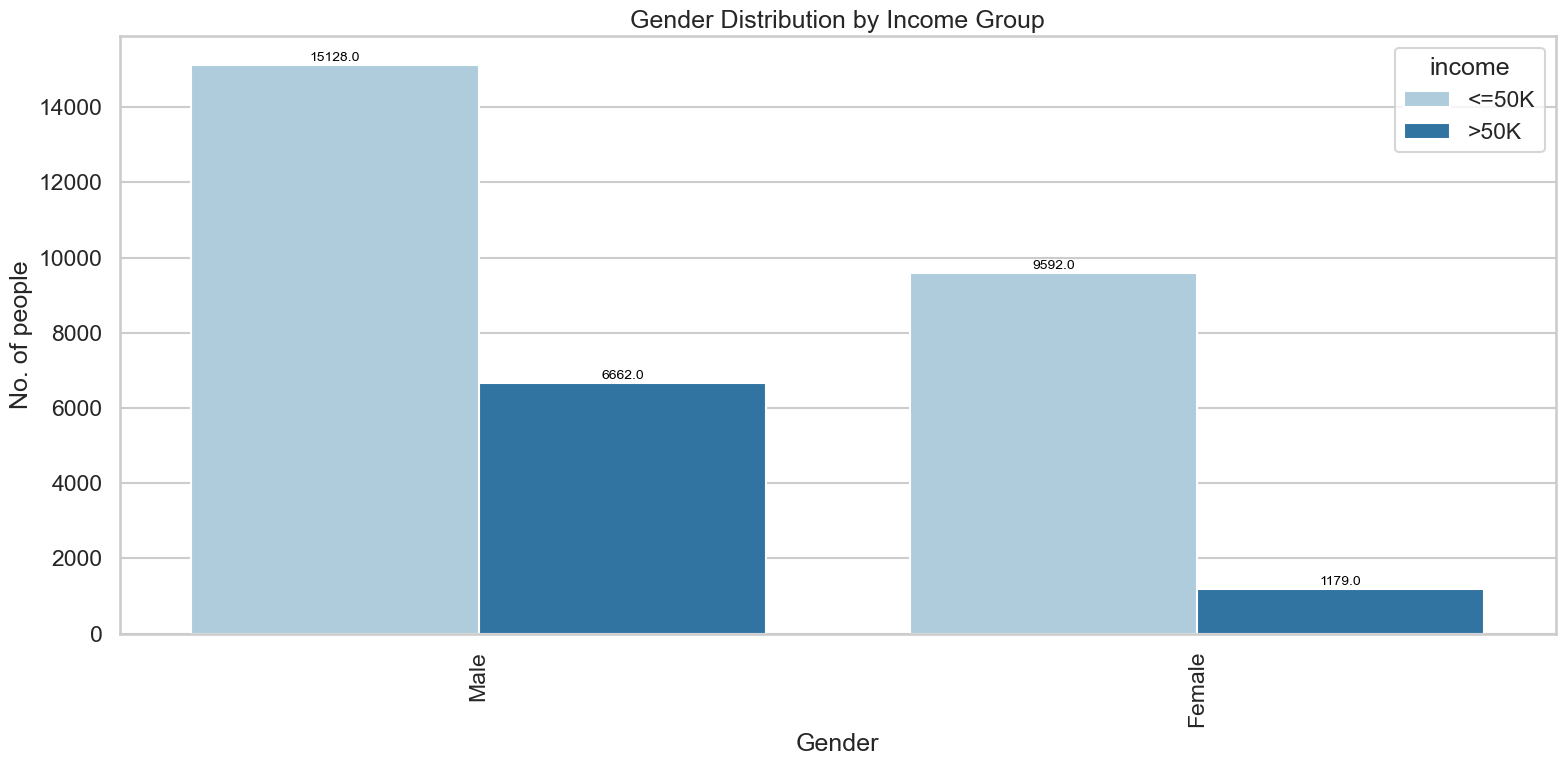

In [22]:
# 'Profession Class', 'Education-num', 'marital-status', 'occupation', 'relationship', 'race', 'Gender' Distribution by Income Group
col = ['Profession Class', 'Education-num', 'marital-status', 'occupation', 'relationship', 'race', 'Gender']

for i in col:
    od = data[i].value_counts().index
    plt.figure(figsize=(16, 8))
    sns.countplot(data = data, x=i, hue='income', order=od)
    plt.title( f'{i} Distribution by Income Group')
    plt.xlabel(i)
    plt.ylabel('No. of people')
    plt.xticks(rotation=90)
    annotate_bar_counts(plt.gca())
    plt.tight_layout()
    plt.show()

From above comparison graphs, we can understand that 
- In most of the occupations, the number of peoples having income<=50k is three times higher than number of peoples having income>50k.
- self employed workclass have more people of income >50k than people of <=50k.
- people who are husbands, wives have almost equal ratio in income earned of >50k and <=50k. And the relation and marital-status bar charts are similar.
- people who have education Bachelors, have more count of earning >50k.
- male have high no.of people of earning income>50k.
- White race people have high count of earning income>50k.

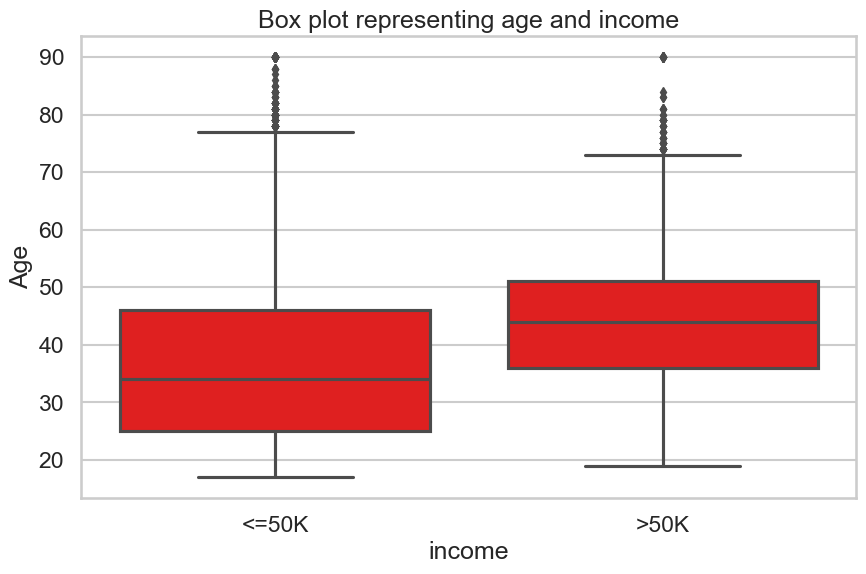

In [23]:
# Box Plotting age by income.
plt.figure(figsize=(10,6))
sns.boxplot(x=data['income'],y=data['Age'],color='r')
plt.title("Box plot representing age and income")
plt.show()

- As we can see in the Box Plot, the median age of people earning less than 50,000 is around 34 years and that of people earling more than 50,000 is around 45 years.

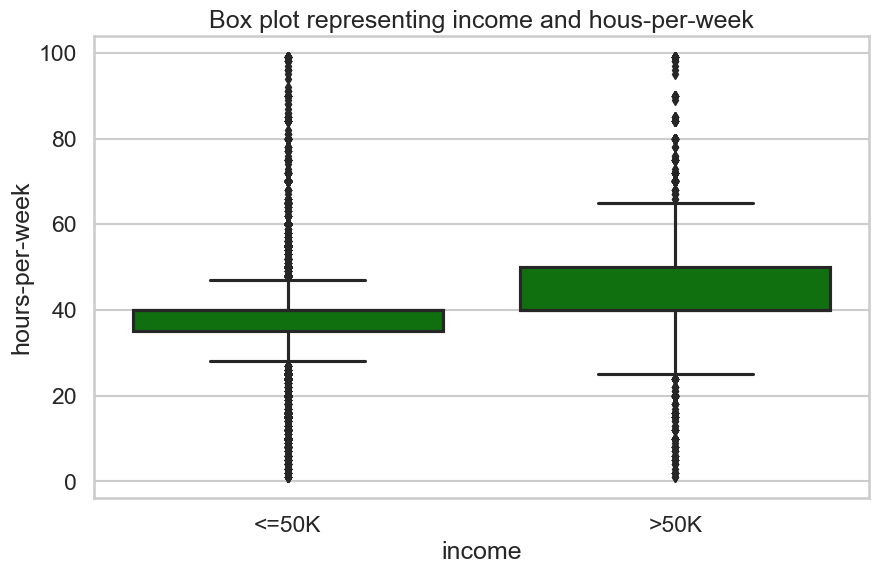

In [24]:
# Box Plotting hours-per-week by income
plt.figure(figsize=(10,6))
sns.boxplot(x=data['income'],y=data['hours-per-week'],color='g')
plt.title("Box plot representing income and hous-per-week")
plt.show()

- From above box plot we can conclude that, Most of them having income<=50k working 40 hours per week. Most of them having income>50k working more that 40 hours per week.

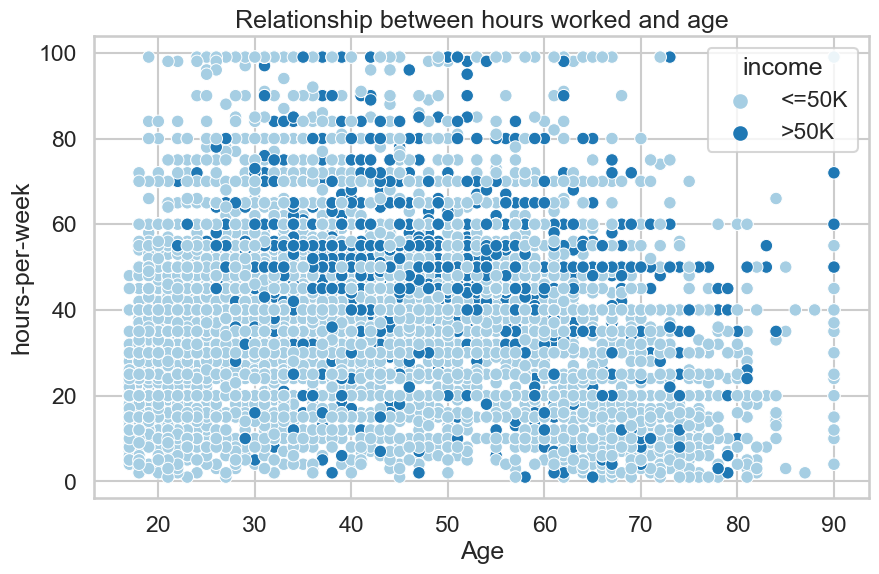

In [25]:
# Scatter Plot between age and hours-per-week with their income.
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x="Age",y="hours-per-week",hue="income")
plt.title('Relationship between hours worked and age')
plt.show()

- From above scatter plot, we can see more >50k plots above 40 hours per week.

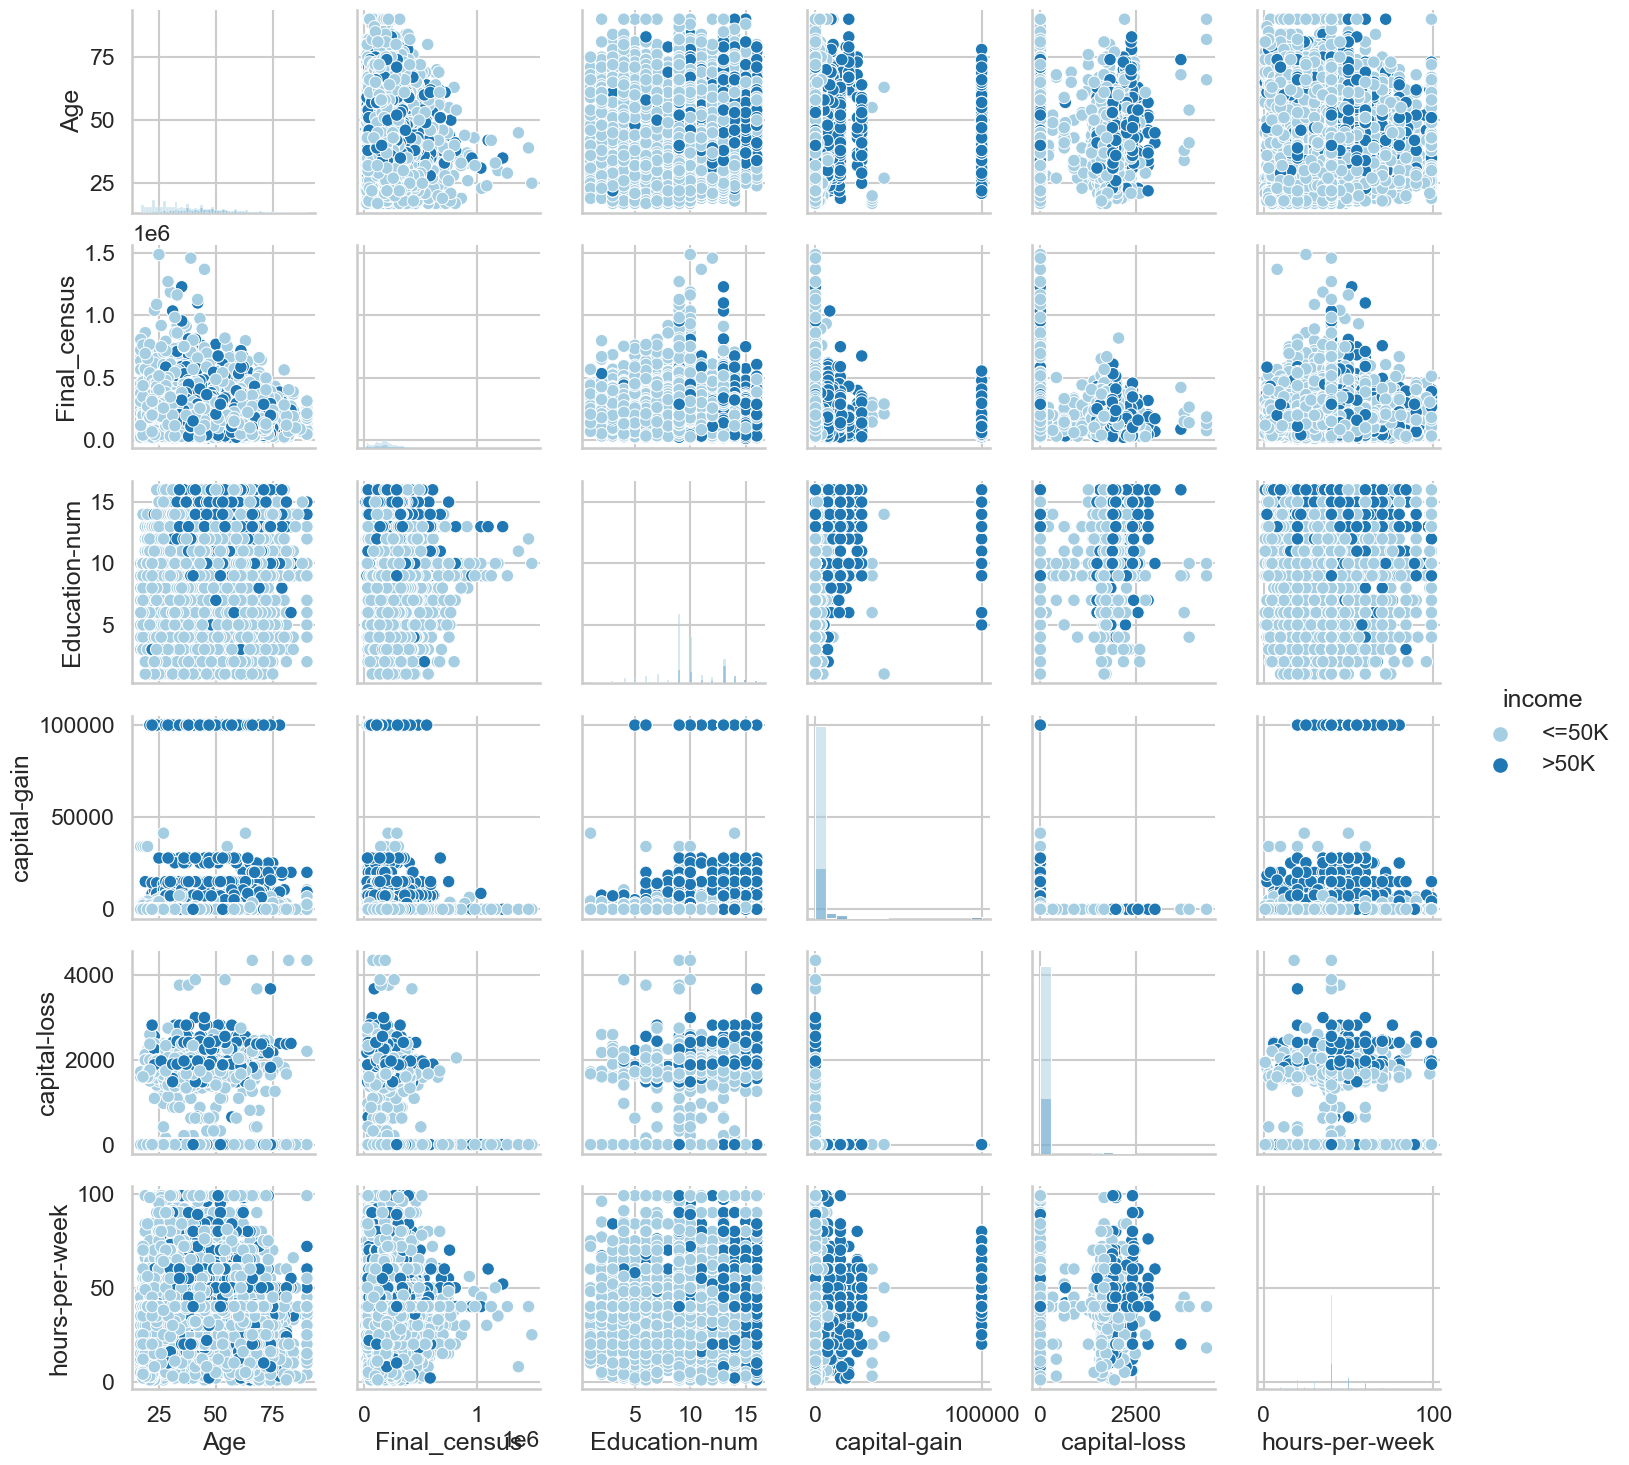

In [26]:
sns.pairplot(data,height =2.5, hue="income", diag_kind="hist")

# Encode Categorical Values


In [27]:
# creating income_num column for values (<= 50k , > 50K) to 0 and 1
data['income_num'] = data['income'].map({'<=50K':0, '>50K':1})

<Axes: >

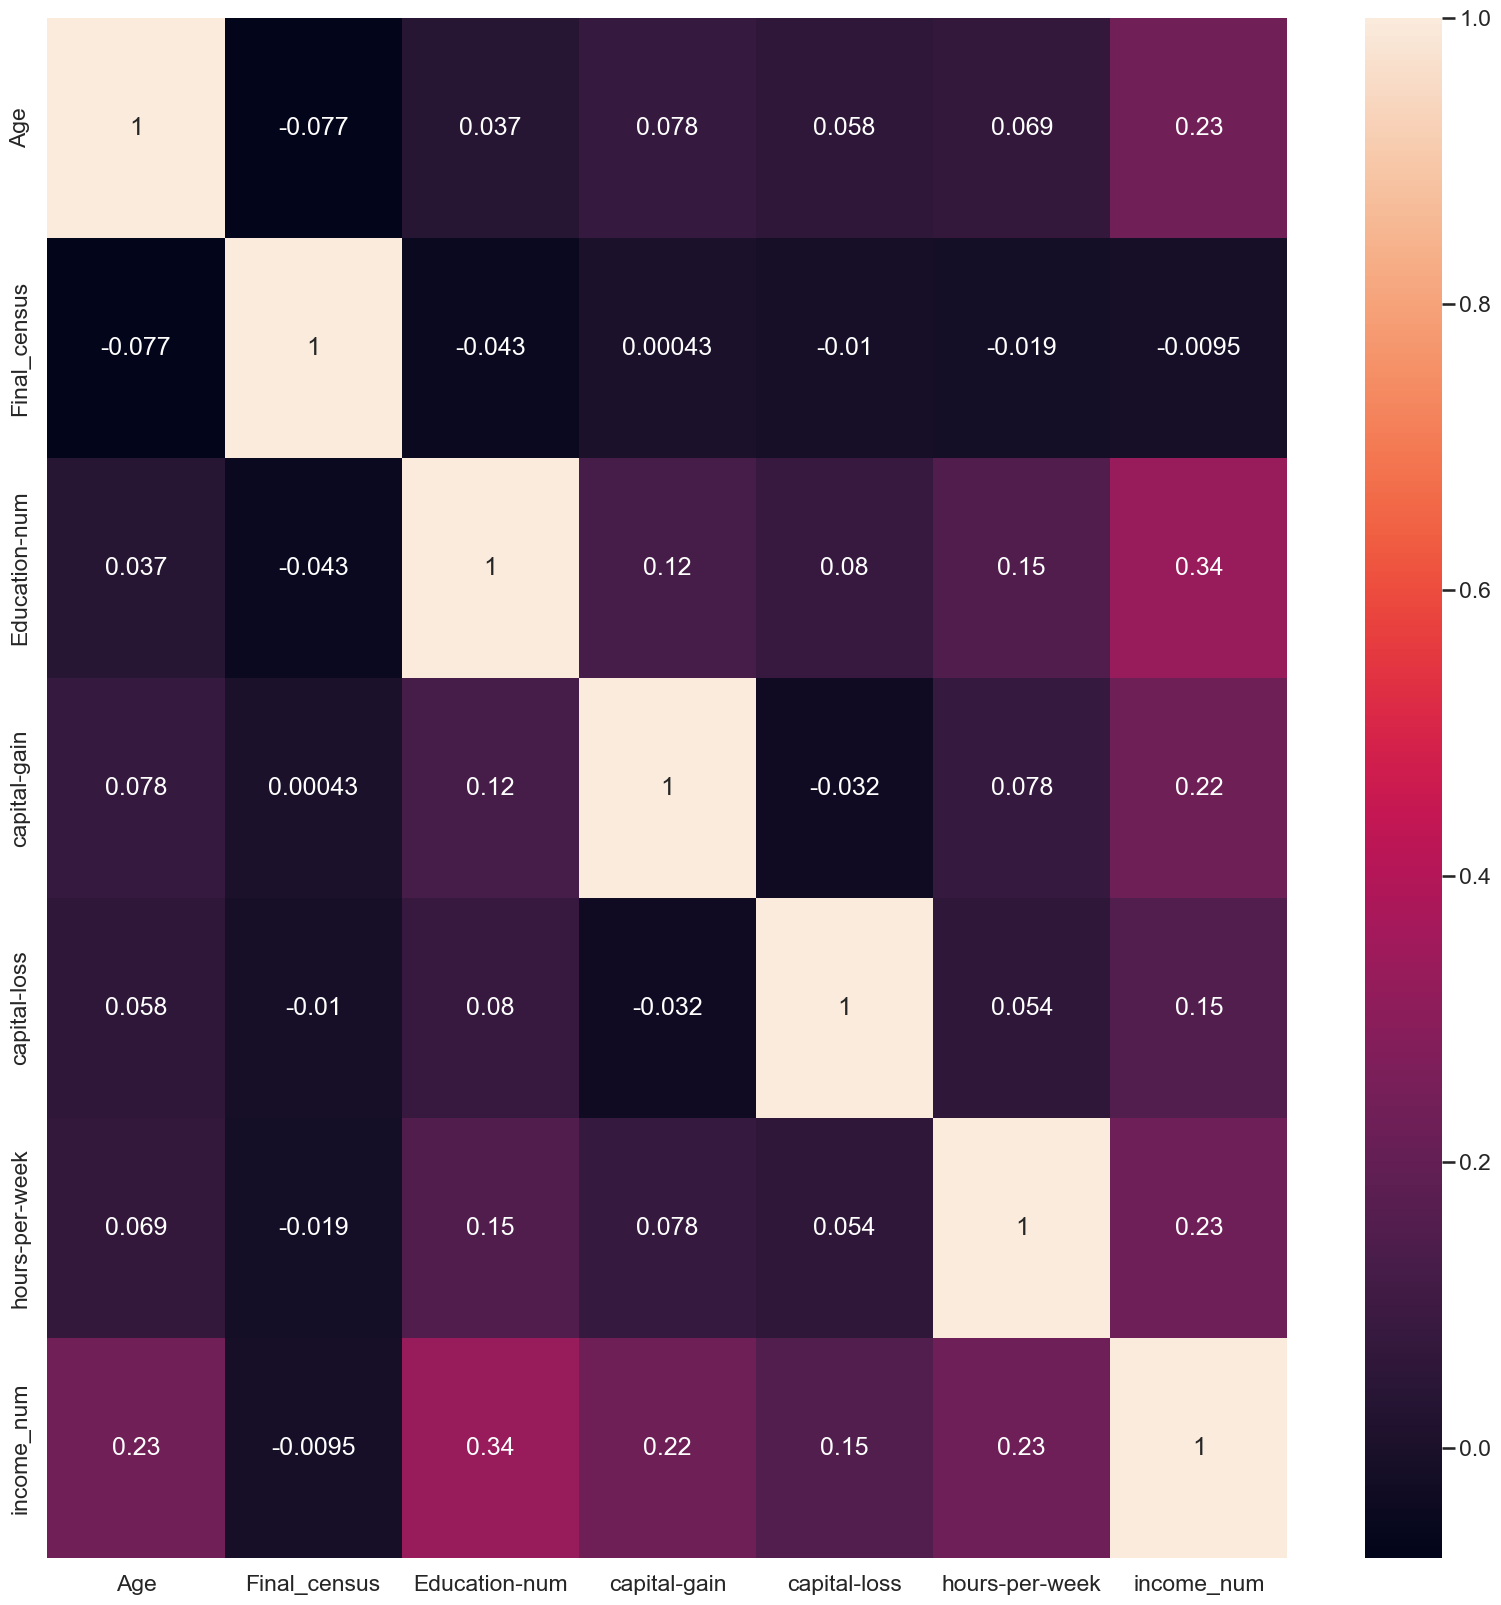

In [28]:
# Heatmap of correlation matrix.
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

- From above correlation matrix, we found that the all correlation co-efficients are near to 0. So we can conclude that all the relationship between quantitative columns are very weakly correlated. Final_census and income_num is very weakly correlated.

In [29]:
# Removing three columns.
data.drop(['income', 'Final_census', 'relationship'], axis = 1, inplace= True)

- Income column is removed because we added income_num column instead of it.
- Final_census is removed because of it is weakly co-related with target variable.
- marital-status and relationship are almost same

In [30]:
# Encoding categorical columns
final_data = data.copy()
columns = ['Profession Class', 'marital-status', 'occupation', 'race', 'Gender', 'country']
final_data = pd.get_dummies(final_data, columns=columns, drop_first=True)
final_data.head()

Age  Education-num  capital-gain  capital-loss  hours-per-week  income_num  \
0   39             13          2174             0              40           0   
1   50             13             0             0              13           0   
2   38              9             0             0              40           0   
3   53              7             0             0              40           0   
4   28             13             0             0              40           0   

   Profession Class_Local-gov  Profession Class_Never-worked  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Profession Class_Private  Profession Class_Self-emp-inc  ...  \
0                         0                              0  ...   
1                         0                              0  ...   
2                         1                              0  ...   
3                         1                              0  ...   
4                         1                              0  ...   

   country_Portugal  country_Puerto-Rico  country_Scotland  country_South  \
0                 0                    0                 0              0   
1                 0                    0                 0              0   
2                 0                    0                 0              0   
3                 0                    0                 0              0   
4                 0                    0                 0              0   

   country_Taiwan  country_Thailand  country_Trinadad&Tobago  \
0               0                 0                        0   
1               0                 0                        0   
2               0                 0                        0   
3               0                 0                        0   
4               0                 0                        0   

   country_United-States  country_Vietnam  country_Yugoslavia  
0                      1                0                   0  
1                      1                0                   0  
2                      1                0                   0  
3                      1                0                   0  
4                      0                0                   0  

[5 rows x 77 columns]

In [31]:
# Saving the data
final_data.to_csv('final_data.csv', index=False)

# ---------------------------------------------------

# Model Building

In [32]:
x = final_data.drop(columns=['income_num'])
y = final_data.income_num
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape

((26048, 76), (6513, 76))

In [33]:
# Balancing the train data to maintain the fairness and to reduce the bias of this model using SMOTE over sampling.

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 6270
Before OverSampling, counts of label '0': 19778
After OverSampling, counts of label '1': 19778
After OverSampling, counts of label '0': 19778


In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
X_train.head()

Age  Education-num  capital-gain  capital-loss  hours-per-week  \
0   33             13             0             0              50   
1   36             11             0          1887              50   
2   58              5             0             0              40   
3   21             11             0             0              46   
4   27             10             0             0              40   

   Profession Class_Local-gov  Profession Class_Never-worked  \
0                           1                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   Profession Class_Private  Profession Class_Self-emp-inc  \
0                         0                              0   
1                         1                              0   
2                         0                              0   
3                         1                              0   
4                         1                              0   

   Profession Class_Self-emp-not-inc  ...  country_Portugal  \
0                                  0  ...                 0   
1                                  0  ...                 0   
2                                  1  ...                 0   
3                                  0  ...                 0   
4                                  0  ...                 0   

   country_Puerto-Rico  country_Scotland  country_South  country_Taiwan  \
0                    0                 0              0               0   
1                    0                 0              0               0   
2                    0                 0              0               0   
3                    0                 0              0               0   
4                    0                 0              0               0   

   country_Thailand  country_Trinadad&Tobago  country_United-States  \
0                 0                        0                      1   
1                 0                        0                      1   
2                 0                        0                      1   
3                 0                        0                      1   
4                 0                        0                      1   

   country_Vietnam  country_Yugoslavia  
0                0                   0  
1                0                   0  
2                0                   0  
3                0                   0  
4                0                   0  

[5 rows x 76 columns]

In [35]:
from pycaret.classification import * 
s = setup(final_data, target='income_num', session_id=123, train_size=.8)

In [52]:
best = compare_models()

Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [37]:
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


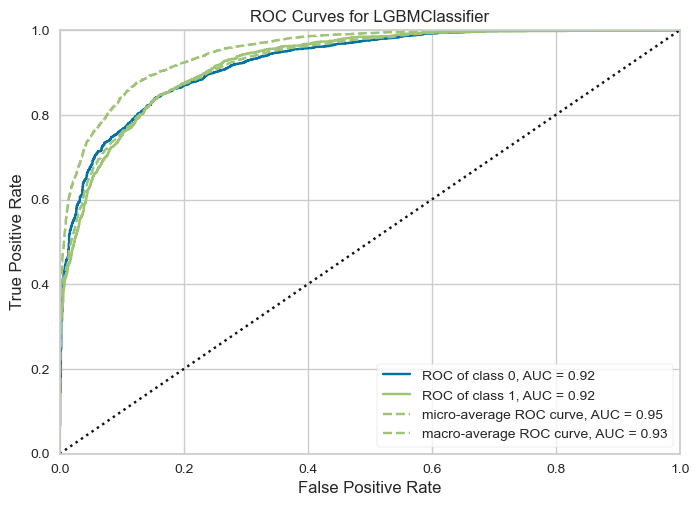

In [38]:
plot_model(best, plot='auc')

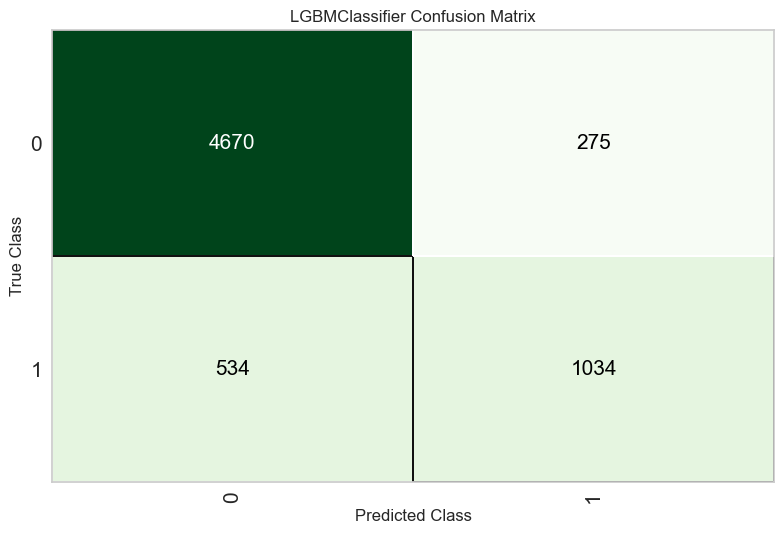

In [39]:
plot_model(best, plot='confusion_matrix')

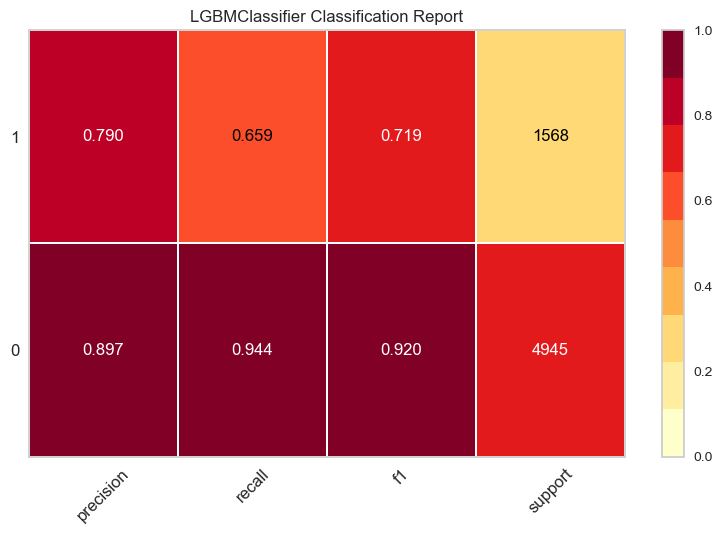

In [40]:
plot_model(best, plot='class_report')

In [53]:
tuned_best = tune_model(best)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [42]:
print(tuned_best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


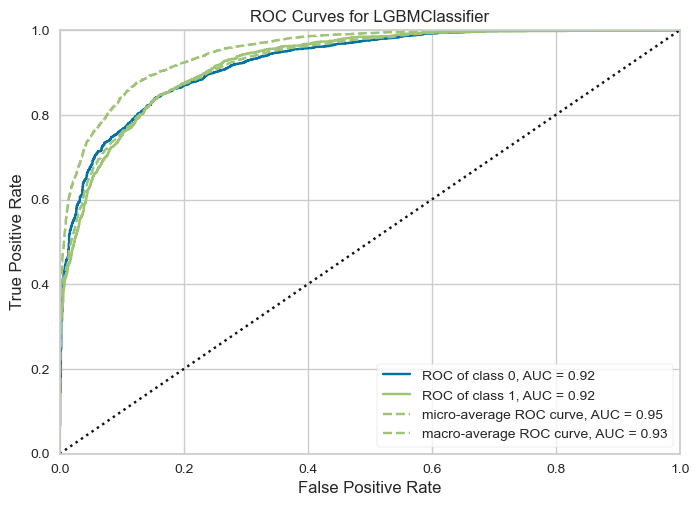

In [71]:
plot_model(tuned_best, plot='auc')

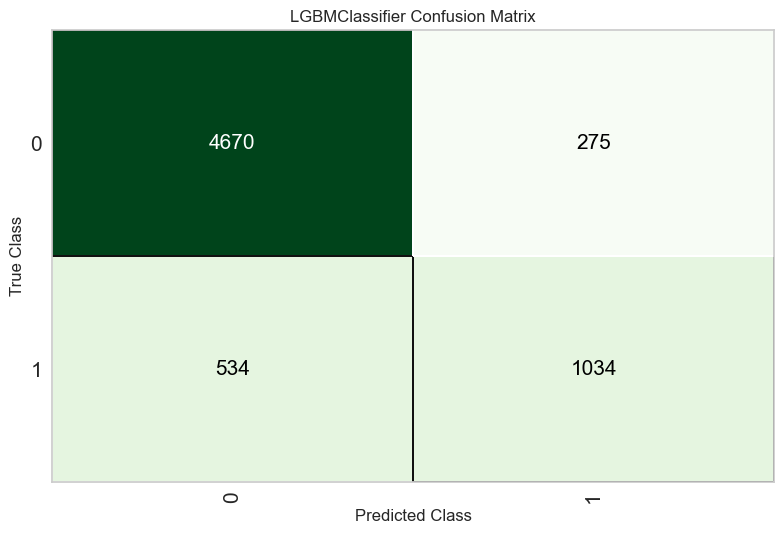

In [44]:
plot_model(tuned_best, plot='confusion_matrix')

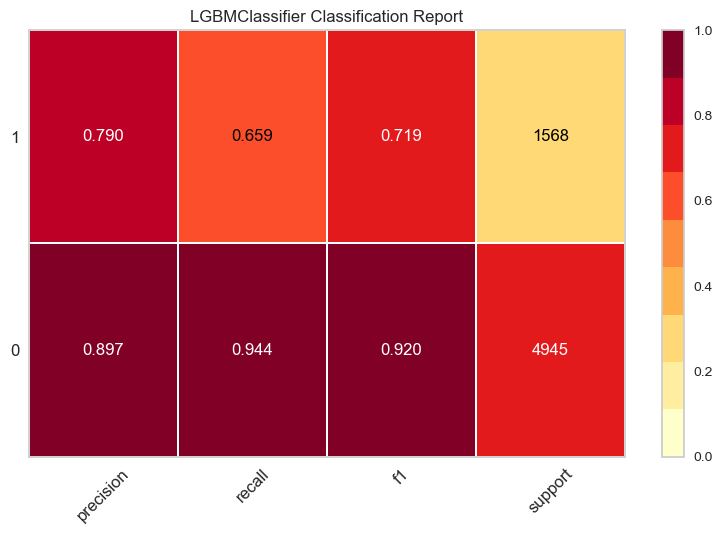

In [45]:
plot_model(tuned_best, plot='class_report')

In [69]:
final_model = finalize_model(tuned_best)

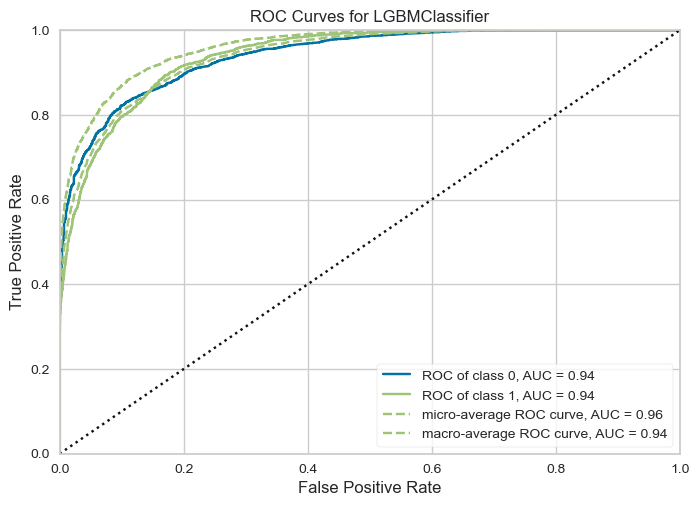

In [78]:
plot_model(final_model, plot='auc')

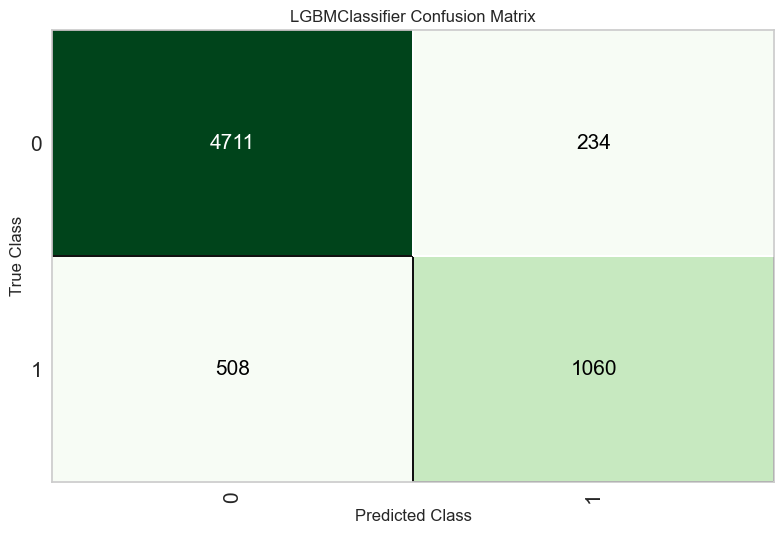

In [79]:
plot_model(final_model, plot='confusion_matrix')

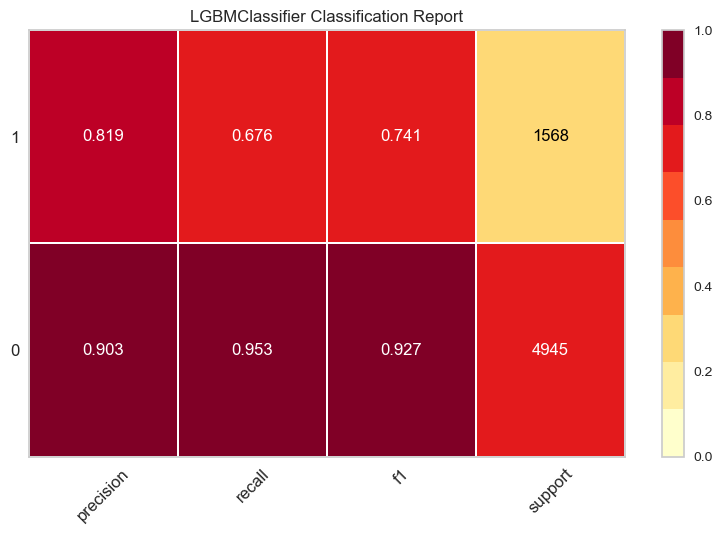

In [82]:
plot_model(final_model, plot='class_report')

In [47]:
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Education-num',
                                             'capital-gain', 'capital-loss',
                                             'hours-per-week',
                                             'Profession Class_Local-gov',
                                             'Profession Class_Never-worked',
                                             'Profession Class_Private',
                                             'Profession Class_Self-emp-inc',
                                             'Profession '
                                             'Class_Self-emp-not-inc',
                                             'Profession Class_Stat...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
       

In [83]:
results=predict_model(final_model, data=final_data)
results.query('income_num == prediction_label').shape

(28754, 79)

# ---------------------------------------------------

# Deploying the Model

In [75]:
import joblib

joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']